## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

In [58]:
! git clone https://github.com/DS3001/knn

fatal: destination path 'knn' already exists and is not an empty directory.


**Q1.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns


df = pd.read_csv("/content/knn/data/USA_cars_datasets.csv")
df.head()
df = df.loc[:,['price','year', 'mileage']]
print(df.head())

print(sum(df['price'].isnull()))
print(sum(df['year'].isnull()))
print(sum(df['mileage'].isnull()))
# no NaNs

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
0
0
0


2. Maxmin normalize `year` and `mileage`.


In [61]:
def maxmin(x):
  mu = ( x - min(x) ) / ( max(x) - min(x) )
  return mu

df['year'] = maxmin(df['year'])
df['milage'] = maxmin(df['mileage'])

df.head() # seems to have worked

,price,year,mileage,milage
0,6300,0.744681,274117,0.269287
1,2899,0.808511,190552,0.187194
2,5350,0.957447,39590,0.038892
3,25000,0.872340,64146,0.063016
4,27700,0.957447,6654,0.006537


3. Split the sample into ~80% for training and ~20% for evaluation.

In [62]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X = df.loc[:,['year', 'mileage']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    random_state=100)

4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?

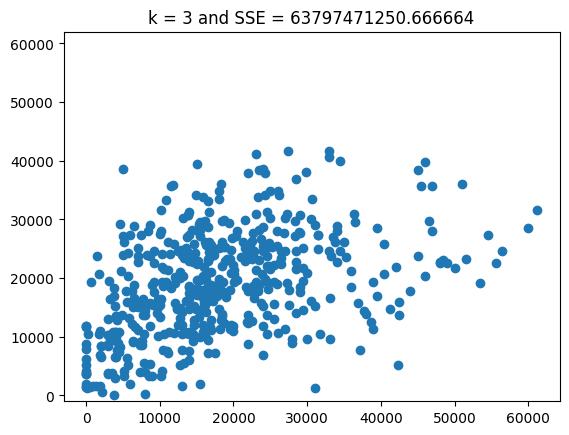

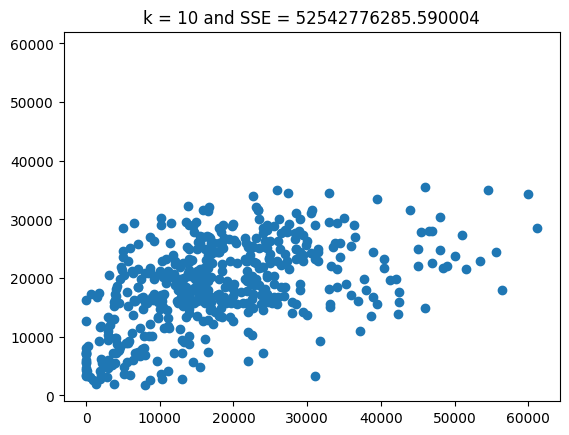

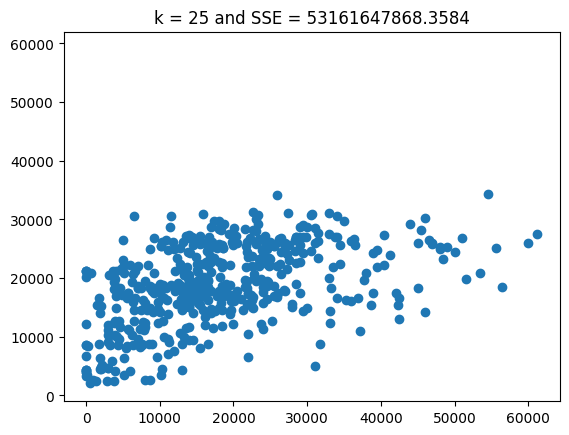

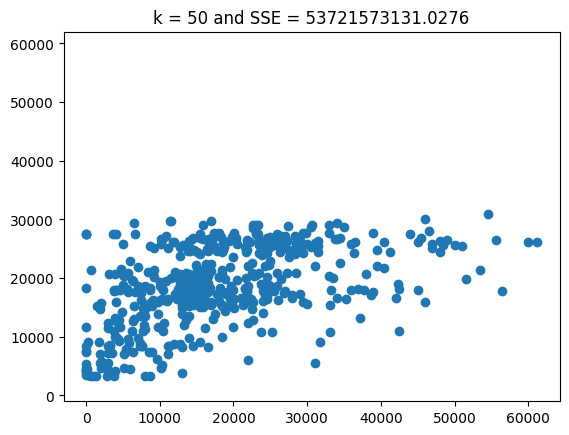

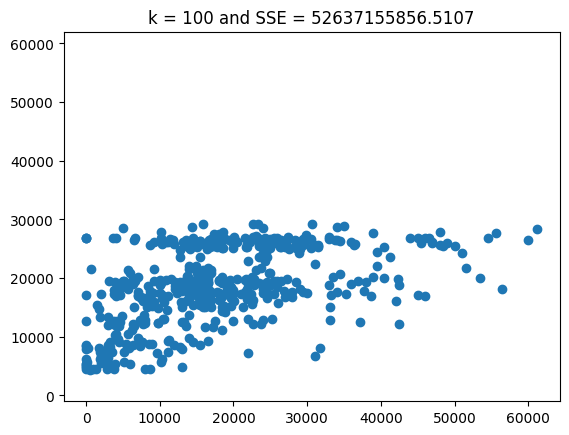

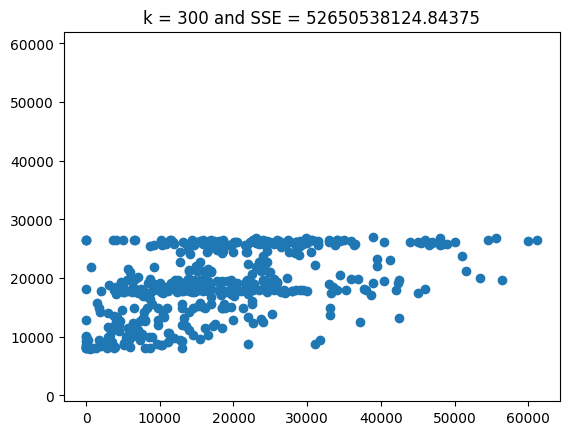

In [63]:
### my code ###
import matplotlib.pyplot as plt

K = [3, 10, 25, 50, 100, 300]
for k in K:
  model = KNeighborsRegressor(n_neighbors=k)
  fitted_model = model.fit(X_train,y_train)
  y_hat = fitted_model.predict(X_test)
  SSE = np.sum( (y_test - y_hat) **2 )

  plot, axes = plt.subplots()
  plt.scatter(y_test,y_hat)
  plt.title("k = " + str(k) + " and SSE = " + str(SSE))
  axes.set_ylim(-1000, 62000)
  plt.show()  # y bound is changing and so the graph is being veritcally squashed
  # as k increases, y_hat decreases

### solutions code ###
# from sklearn.neighbors import KNeighborsRegressor
# import matplotlib.pyplot as plt

# for k in [3,10,25,50,100,300]:
#     model = KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
#     y_hat = model.predict(X_test)
#     SSE = np.sum( (y_test-y_hat)**2 )
#     #
#     plot, axes = plt.subplots()
#     plt.scatter(y_test,y_hat)
#     plt.title('k: '+str(k)+', SSE: '+str(SSE))
#     axes.set_ylim(-1000, 62000)
#     axes.set_xlim(-1000, 62000)
#     plt.show()

5. Determine the optimal $k$ for these data.

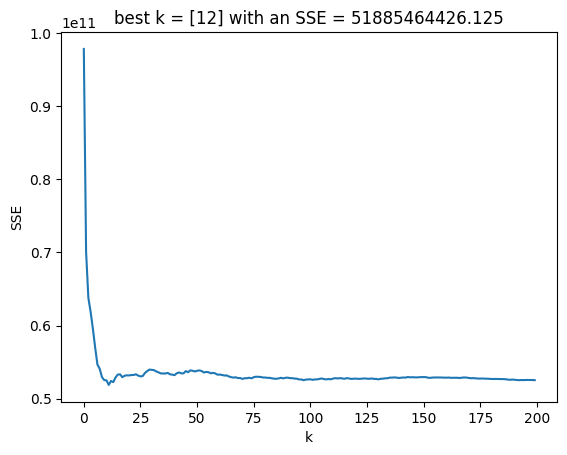

In [65]:
SSE = np.zeros(200)
k_grid = np.arange(1,200)

for k in range(200):
  model = KNeighborsRegressor(n_neighbors=k+1)
  fitted_model = model.fit(X_train,y_train)
  y_hat = fitted_model.predict(X_test)
  SSE[k] = np.sum( (y_test - y_hat) **2 )

best_SSE = np.min(SSE)
min_index = np.where(SSE == best_SSE)
best_k = k_grid[min_index]

### From solutions for printing
plt.plot(np.arange(0,200),SSE)
plt.xlabel("k")
plt.title('best k = '+str(best_k)+' with an SSE = '+str(best_SSE))
plt.ylabel('SSE')
plt.show()



6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

Small k's would underfit the model, because fewer points would be considered and the actual pattern would not be found. Similarly with larger k's, they would overfit the model and take into account points that are not particularly relevant for predicting the price. This was very apparent as k increased and y_hat decreased, moving towards an average that resulted from taking into consideration a large amoount of points. When k was the optimal of 12, the plot was neither overfitted nor underfitted and it is the "sweet spot" so to speak.

**Q2.** This question is a case study for $k$ nearest neighbor. The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("/content/knn/data/heart_failure_clinical_records_dataset.csv")
#df.head()
print(df.shape)
df.describe()
# no NaNs because the count column has 299 for all variables and there are 299 observations
df = df.drop('time', axis=1)
df.head()

(299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


2. Make a correlation matrix. What variables are strongly associated with a death event?

In [67]:
df.corr()
# smoking and sex with 0.445892

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?

In [68]:
print(df.loc[:,['anaemia','DEATH_EVENT']].groupby('anaemia').describe())  # higher mean of death when anaemia is 1
print("-----------------------------------")
print(df.loc[:,['smoking','DEATH_EVENT']].groupby('smoking').describe())  # slightly lower mean of death when smoking is 1 but not a very significant change
print("-----------------------------------")
print(df.loc[:,['high_blood_pressure','DEATH_EVENT']].groupby('high_blood_pressure').describe())  # higher mean of death when high_blood_pressure is 1
print("-----------------------------------")
print(df.loc[:,['sex','DEATH_EVENT']].groupby('sex').describe())  # slightly lower mean of death when sex is 1 but not a very significant change
print("-----------------------------------")
print(df.loc[:,['smoking','DEATH_EVENT']].groupby('smoking').describe())  # slightly lower mean of death when smoking is 1 but not a very significant change

        DEATH_EVENT                                             
              count      mean       std  min  25%  50%  75%  max
anaemia                                                         
0             170.0  0.294118  0.456991  0.0  0.0  0.0  1.0  1.0
1             129.0  0.356589  0.480859  0.0  0.0  0.0  1.0  1.0
-----------------------------------
        DEATH_EVENT                                             
              count      mean       std  min  25%  50%  75%  max
smoking                                                         
0             203.0  0.325123  0.469579  0.0  0.0  0.0  1.0  1.0
1              96.0  0.312500  0.465946  0.0  0.0  0.0  1.0  1.0
-----------------------------------
                    DEATH_EVENT                                             
                          count      mean       std  min  25%  50%  75%  max
high_blood_pressure                                                         
0                         194.0  0.293814  0.45

4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.

In [69]:
# looked at correlation matrix where the correlation was roughly stronger or as strong as high_blood_pressure and anaemia
pred_vars = ['high_blood_pressure', 'anaemia', 'age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']
y = df['DEATH_EVENT']
X = df.loc[:, pred_vars]
X

,high_blood_pressure,anaemia,age,creatinine_phosphokinase,ejection_fraction,serum_creatinine,serum_sodium
0,1,0,75.0,582,20,1.9,130
1,0,0,55.0,7861,38,1.1,136
2,0,0,65.0,146,20,1.3,129
3,0,1,50.0,111,20,1.9,137
4,0,1,65.0,160,20,2.7,116
...,...,...,...,...,...,...,...
294,1,0,62.0,61,38,1.1,143
295,0,0,55.0,1820,38,1.2,139
296,0,0,45.0,2060,60,0.8,138
297,0,0,45.0,2413,38,1.4,140


5. Maxmin normalize all of the variables in `X`.

In [70]:
def maxmin(x):
  mu = ( x - min(x) ) / ( max(x) - min(x) )
  return mu

for var in pred_vars:
  X[var] = maxmin(X[var])

X

,high_blood_pressure,anaemia,age,creatinine_phosphokinase,ejection_fraction,serum_creatinine,serum_sodium
0,1.0,0.0,0.636364,0.071319,0.090909,0.157303,0.485714
1,0.0,0.0,0.272727,1.000000,0.363636,0.067416,0.657143
2,0.0,0.0,0.454545,0.015693,0.090909,0.089888,0.457143
3,0.0,1.0,0.181818,0.011227,0.090909,0.157303,0.685714
4,0.0,1.0,0.454545,0.017479,0.090909,0.247191,0.085714
...,...,...,...,...,...,...,...
294,1.0,0.0,0.400000,0.004848,0.363636,0.067416,0.857143
295,0.0,0.0,0.272727,0.229268,0.363636,0.078652,0.742857
296,0.0,0.0,0.090909,0.259888,0.696970,0.033708,0.714286
297,0.0,0.0,0.090909,0.304925,0.363636,0.101124,0.771429


6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).

In [71]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X = df.loc[:,pred_vars]
y = df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    random_state=100)

7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.

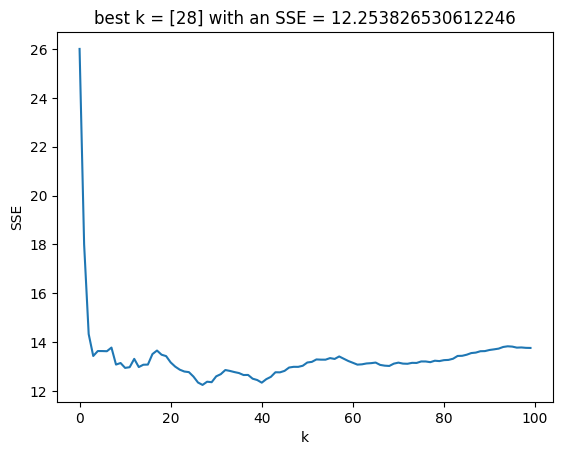

In [75]:
k_bar = 100
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)

for k in range(k_bar):
    fitted_model = KNeighborsRegressor(n_neighbors=k+1).fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat) **2 )

SSE_min = np.min(SSE)
min_index = np.where(SSE == SSE_min)
best_k = k_grid[min_index]

plt.plot(np.arange(0,k_bar),SSE)
plt.xlabel("k")
plt.title('best k = '+str(best_k)+' with an SSE = '+str(SSE_min))
plt.ylabel('SSE')
plt.show()


8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

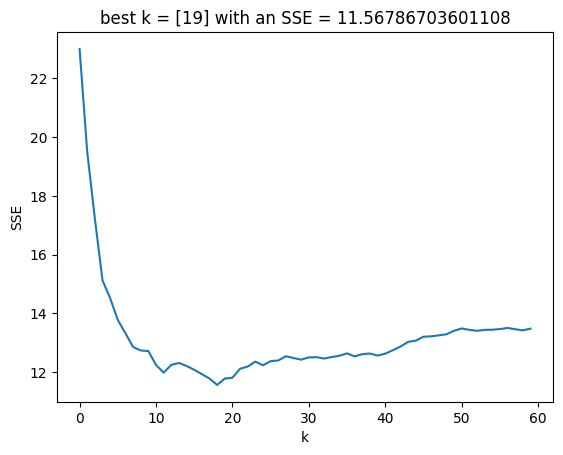

In [76]:
y = df['DEATH_EVENT']
new_df = df.drop('DEATH_EVENT', axis=1)
new_df = new_df.apply(maxmin)
X_train, X_test, y_train, y_test = train_test_split(new_df,y,
                                                    test_size=.2,
                                                    random_state=100)

k_bar = 60
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)

for k in range(k_bar):
    fitted_model = KNeighborsRegressor(n_neighbors=k+1).fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat) **2 )

SSE_min = np.min(SSE)
min_index = np.where(SSE == SSE_min)
best_k = k_grid[min_index]

plt.plot(np.arange(0,k_bar),SSE)
plt.xlabel("k")
plt.title('best k = '+str(best_k)+' with an SSE = '+str(SSE_min))
plt.ylabel('SSE')
plt.show()


# minimum SSE decreased with all variables; maybe poor variable choices
# In practice more select variables should generally be better to fit a model off of, although that is not what it appears based off of my fitted model (more is not always better)

**Q3.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)